# 3D ábrák

A `matplotlib` csomag elsősorban 2D ábrák gyártására lett kitalálva. Ennek ellenére rendelkezik néhány 3D-s ábra készítési függvénnyel is. Vizsgáljunk meg ebből párat! Ahhoz hogy a 3D-s ábrázolási függvényeket el tudjuk érni be kell tölteni a `matplotlib` csomag `mpl_toolkits.mplot3d` alcsomagját. 

In [1]:
%pylab inline     
from mpl_toolkits.mplot3d import * #3D-s ábrák alcsomagja
from ipywidgets import *  #interaktivitáshoz szükséges függvények

Populating the interactive namespace from numpy and matplotlib


## Térbeli  görbék, adathalmazok

Ahhoz hogy egy ábrát térben tudjunk megjeleníteni fel kell készíteni a környezetet. A térbeli ábrák megjelenítése és azok tulajdonságainak beállítása kicsit körülményesebb a 2D-s ábráknál. A legszembetűnőbb különbség hogy az ábrák úgynevezett `axes` (körül belül itt a koordináta tengelyekre kell gondolni...) objektumok köré csoportusulnak, s ezek tulajdonságaiként  illetve ezeken alkalmazott függvényekként jönnek létre maguk az ábrák. Példaképpen ábrázoljunk egy egszerű paraméteres térbeli görbét! Legyen ez a görbe a következő spirális függvény:

\begin{equation}
\mathbf{r}(t)=\left(\begin{array}{c}
\cos(3t)\\
\sin(3t)\\
t
\end{array}\right)
\end{equation}

Először is gyártsuk let a $t$ paraméter mintavételezési pontjait a $[0,2\pi]$ intervallumban:

In [3]:
t=linspace(0,2*pi,100) # 100 pont 0 és 2*pi között

A következő kód cellában két dolog fog történni. Előszöris létrehozzuk az `ax` nevű `axes` objektumot amelynek expliciten megadjuk hogy 3D-s koordináta rendszer legyen. Illetve erre az objektumra hatva a `plot` függvénnyel létrehozzuk magát az ábrát. Figyeljük meg hogy most a `plot` függvény hárum bemenő paramétert vár!  

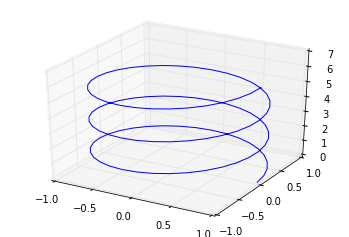

In [4]:
ax=subplot(1,1,1,projection='3d') #térbeli koordináta tengely létrehozása
ax.plot(cos(3*t),sin(3*t),t)

Ahogy a síkbeli ábráknál láttuk a `plot` függvényt itt is használhatjuk rendezetlenül mintavételezett adatok ábrázolására is. 

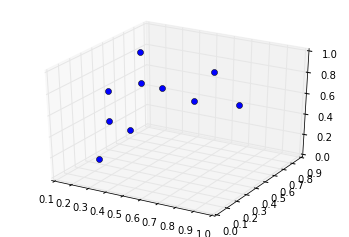

In [5]:
ax=subplot(1,1,1,projection='3d')
ax.plot(rand(10),rand(10),rand(10),'o')

A stílus definíciók a 2D ábrákhoz hasonló kulcsszavas argumentumok alapján dolgozódnak fel! Lássunk erre is egy példát:

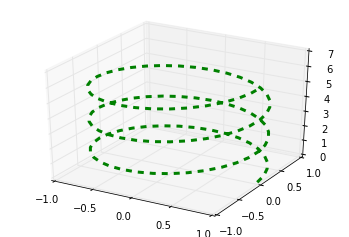

In [6]:
ax=subplot(1,1,1,projection='3d') #térbeli koordináta tengely létrehozása
ax.plot(cos(3*t),sin(3*t),t,color='green',linestyle='dashed',linewidth=3)

Térbeli ábrák megjelenítése kapcsán rendszeresen felmerülő probléma hogy jó irányból nézzünk rá az ábrára. Az ábra nézőpontjait a `view_init` függvény segítségével tudjuk megadni. A `view_init`-nek két paramétere [ekvatoriális gömbi koordinátarendszerben](https://hu.wikipedia.org/wiki/Koordin%C3%A1ta-rendszer) adják meg az ábra nézőpontját. A két bemenő paraméter a  deklináció és az azimut szögek fokban mérve. Példáuk az $x$-tengely felől így lehet készíteni ábrát:

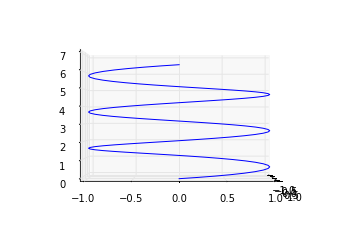

In [7]:
ax=subplot(1,1,1,projection='3d') #térbeli koordináta tengely létrehozása
ax.plot(cos(3*t),sin(3*t),t)
ax.view_init(0,0)

Az $y$-tengely felől pedig így:

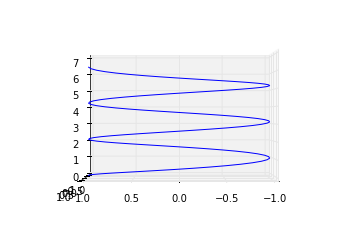

In [8]:
ax=subplot(1,1,1,projection='3d') #térbeli koordináta tengely létrehozása
ax.plot(cos(3*t),sin(3*t),t)
ax.view_init(0,90)

Ha interaktív függvényeket használunk akkor a nézőpontot az alábbiak szerint interaktívan tudjuk változtatni:

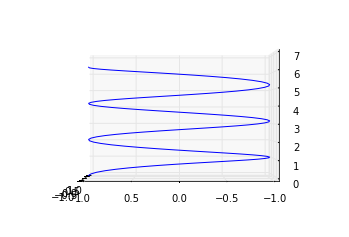

In [9]:

def forog(th,phi):
    ax=subplot(1,1,1,projection='3d')
    ax.plot(sin(3*t),cos(3*t),t)
    ax.view_init(th,phi)

interact(forog,th=(-90,90),phi=(0,360));

## Kétváltozós függvények és felületek

A térbeli ábrák egyik előnye hogy térbeli felületeket is meg tudunk jeleníteni. Ennek a legegyszerűbb esete a kétváltozós
$$z=f(x,y)$$
 függvények magasság térkép szerű ábrázolása. Ahogy azt már megszoktuk itt is az első feladat a mintavételezés és a függvény kiértékelés. Az alábbiakban vizsgáljuk meg a $$z=-[\sin(x) ^{10} + \cos(10 + y  x)  \cos(x)]\exp((-x^2-y^2)/4)$$ függvényt!

In [10]:
x,y = meshgrid(linspace(-3,3,250),linspace(-5,5,250)) # mintavételezési pontok legyártása.
z = -(sin(x) ** 10 + cos(10 + y * x) * cos(x))*exp((-x**2-y**2)/4) # függvény kiértékelés

A `plot_surface` függvény segítségével jeleníthetjük meg ezt a függvényt.

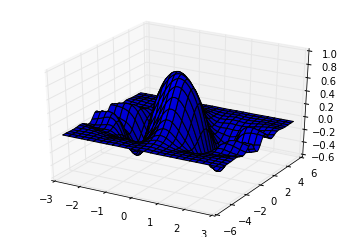

In [11]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z)

Sokszor szemléletes a kirajzolódott felületet valamilyen színskála szerint szinezni. Ezt a síkbeli ábráknál már megszokott módon a  `cmap` kulcsszó segítségével tehetjük.

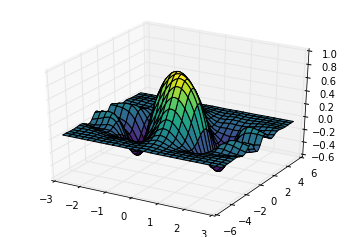

In [12]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z,cmap='viridis')

A térbeli felületek legálltalánosabb megadása két paraméteres vektor értékű függvényekkel lehetséges. Azaz 

\begin{equation}
\mathbf{r}(u,v)=\left(\begin{array}{c}
f(u,v)\\
g(u,v)\\
h(u,v)
\end{array}\right)
\end{equation}

Vizsgáljunk meg erre egy példát ahol a megjeleníteni kívánt felület egy tórusz! A [tórusz](https://hu.wikipedia.org/wiki/T%C3%B3rusz) egy lehetséges paraméterezése a következő:

\begin{equation}
\mathbf{r}(\theta,\varphi)=\left(\begin{array}{c}
(R_1 + R_2 \cos \theta) \cos{\varphi}\\
(R_1 + R_2 \cos \theta) \sin{\varphi} \\
R_2 \sin \theta
\end{array}\right)
\end{equation}

Itt $R_1$ és $R_2$ a tórusz két sugarának paramétere, $\theta$ és $\varphi$ pedig mind a ketten a $[0,2\pi]$ intervallumon futnak végig. Legyen $R_1=4$ és $R_2=1$. Rajzoljuk ki ezt a felületet! Első lépésként gyártsuk le az ábrázolandó felület pontjait:


In [12]:
theta,phi=meshgrid(linspace(0,2*pi,250),linspace(0,2*pi,250))
x=(4 + 1*cos(theta))*cos(phi)
y=(4 + 1*cos(theta))*sin(phi) 
z=1*sin(theta)

Ábrázolni ismét a `plot_surface` függvény segítségével tudunk:

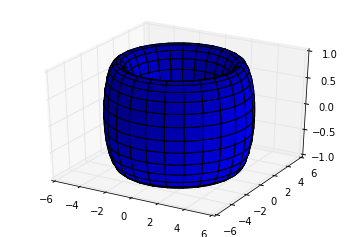

In [13]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z)

A fenti ábrát egy kicsit arányosabbá tehetjük ha a tengelyek megjelenítésének arányát illetve a tengerek határait átállítjuk. Ezt a `set_aspect` illetve a `set_xlim`, `set_ylim` és `set_zlim` függvények segítségével tehetjük meg:

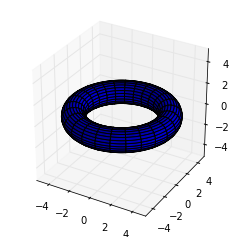

In [14]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z)
ax.set_aspect('equal');
ax.set_xlim(-5,5);
ax.set_ylim(-5,5);
ax.set_zlim(-5,5);

Végül tegyük ezt az ábrát is interaktívvá:

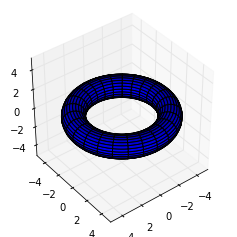

In [15]:
def forog(th,ph):
    ax = subplot(111, projection='3d')
    ax.plot_surface(x, y, z)
    ax.view_init(th,ph)
    ax.set_aspect('equal');
    ax.set_xlim(-5,5);
    ax.set_ylim(-5,5);
    ax.set_zlim(-5,5);

interact(forog,th=(-90,90),ph=(0,360));

## Erőterek 3D-ben

Térbeli vektor tereket, azaz olyan függvényeket amelyek a tér minden pontjához egy három dimenziós vektort rendelnek a síkbeli ábrákhoz hasonlóan itt is a quiver parancs segítségével tudunk megjeleníteni. Az alábbi példában az egység gömb felületének 100 pontjába rajzolunk egy-egy radiális irányba mutató vektort:

In [16]:
phiv,thv=(2*pi*rand(100),pi*rand(100))                    #Ez a két sor a térbeli egység gömb 
xv,yv,zv=(cos(phiv)*sin(thv),sin(phiv)*sin(thv),cos(thv)) #100 véletlen pontját jelöli ki
uv,vv,wv=(xv,yv,zv)                                       #Ez pedig a megfelelő pontokhoz hozzá rendel egy egy radiális vektort

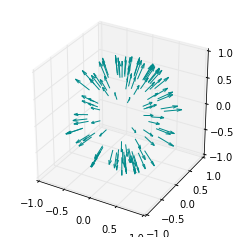

In [17]:
ax = subplot(111, projection='3d')
ax.quiver(xv, yv, zv, uv, vv, wv, length=0.3,color='darkcyan')
ax.set_aspect('equal')